<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_sklearn/blob/main/Decision_Tree_Regressior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn


In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score # 导入交叉验证模块
from sklearn.tree import DecisionTreeRegressor

In [ ]:
boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0) # 实例化
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring="neg_mean_squared_error")
# 第一个参数是具体模型
# 第二个参数是完整的数据集（不要划分）
# 第三个参数是完整的标签
# 第四个参数是交叉验证的次数（默认是5）
# 第五个参数没有返回的是R^2(很少用，R^2越接近1效果越好), 加上是负均方误差

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

回归树实例：一维回归的图像绘制

1. 导入所需要的库

In [50]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

2. 创建一条含有噪声的正弦函数

In [51]:
rng = np.random.RandomState(1) # 生成随机数种子(固定的随机)
X = np.sort(5*rng.rand(80,1),axis=0) # 生成随机数rand(80，1)80行1列的数组(数通常都小于1)  fit函数不允许导入一维数组，故创建2维
y = np.sin(X).ravel() # y中只能有1维，ravel()进行降维，降到1维, 在正弦曲线上加上噪音

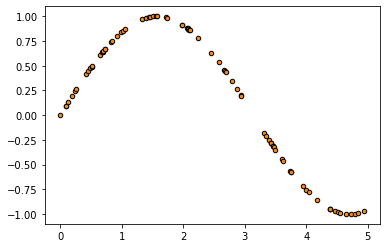

In [52]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor='black', c="darkorange", label="data")

In [53]:
y[::5] += 3 * (0.5 - rng.rand(16)) # 表示y的行列中每5个取一个，5表示步长

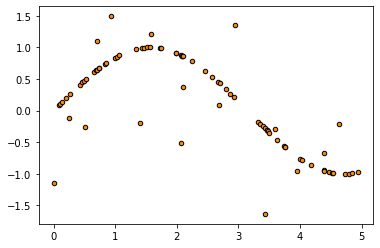

In [54]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor='black', c="darkorange", label="data")

In [55]:
np.random.random((2,1))  # 2行1列----2维

array([[0.69991428],
       [0.01627188]])

np.random.random((2,1)).ravel()  # 变成一维

In [56]:
np.random.random((2,1)).shape, np.random.random((2,1)).ravel().shape

((2, 1), (2,))

In [57]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [58]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] # 升维操作

In [59]:
L = np.arange(0,5,1)
L, L.shape

(array([0, 1, 2, 3, 4]), (5,))

In [60]:
L[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [61]:
L[:, np.newaxis].shape

(5, 1)

In [62]:
L[np.newaxis, :].shape

(1, 5)

In [63]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

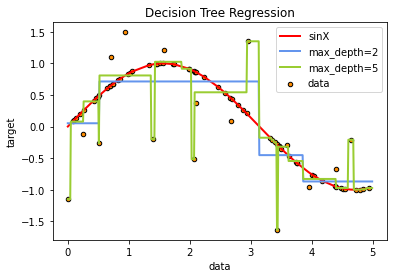

In [70]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")  # c代表的是点的颜色, scatter是散点图
plt.plot(X, np.sin(X), color="red", label="sinX", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 如果树的最大深度（由max_depth参数控制）设置得太高，则决策树学习得太精细，它从训练数据中学了很多细节，包括噪声得呈现，从而使模型偏离真实的正弦曲线，形成过拟合